In [1]:
import os
import pandas as pd
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt


df_bank = pd.read_csv('/workspaces/7641HW1/data/BankMarketingData.csv')
print("Data has",len(df_bank),"rows and", len(df_bank.columns),"columns.")
if df_bank.isnull().values.any():
    print("Warning: Missing Data")

Data has 45307 rows and 21 columns.


In [2]:
subset_df = df_bank [:1000]
subset_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,32,entrepreneur,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
996,41,services,single,high.school,no,yes,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
997,59,housemaid,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
998,57,technician,married,basic.9y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [3]:

col_1hot = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_1hot = df_bank[col_1hot]
df_1hot = pd.get_dummies(df_1hot).astype('category')
df_others = df_bank.drop(col_1hot,axis=1)
df_bank = pd.concat([df_others,df_1hot],axis=1)
column_order = list(df_bank)
column_order.insert(0, column_order.pop(column_order.index('y')))
df_bank = df_bank.loc[:, column_order]
df_bank['y'].replace("no",0,inplace=True)
df_bank['y'].replace("yes",1,inplace=True)
df_bank['y'] = df_bank['y'].astype('category')

numericcols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_num = df_bank[numericcols]
df_stand =(df_num-df_num.min())/(df_num.max()-df_num.min())
df_bank_categorical = df_bank.drop(numericcols,axis=1)
df_bank = pd.concat([df_bank_categorical,df_stand],axis=1)
df_bank.describe(include='all')

/tmp/ipykernel_35669/1444988200.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['y'].replace("no",0,inplace=True)
/tmp/ipykernel_35669/1444988200.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.0,45307,45307,45307,45307,45307,45307,45307,45307,45307,...,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
unique,2.0,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40216.0,33873,35169,43703,44137,42059,43421,43727,40945,44350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.284348,0.052491,0.028452,0.963252,0.024935,0.725451,0.535866,0.430867,0.677238,0.768943
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128536,0.052636,0.050041,0.187558,0.071338,0.327131,0.225597,0.193519,0.393188,0.273651
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
import timeit

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12

def import_data():

    #X1 = np.array(df_phish.values[:,1:-1],dtype='int64')
    #Y1 = np.array(df_phish.values[:,0],dtype='int64')
    X2 = np.array(df_bank.values[:,1:-1],dtype='int64')
    Y2 = np.array(df_bank.values[:,0],dtype='int64')
    return X2, Y2


def plot_learning_curve(clf, X, y, title="Insert Title"):
    
    n = len(y)
    train_mean = []; train_std = [] #model performance score (f1)
    cv_mean = []; cv_std = [] #model performance score (f1)
    fit_mean = []; fit_std = [] #model fit/training time
    pred_mean = []; pred_std = [] #model test/prediction times
    train_sizes=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X[idx,:]
        y_subset = y[idx]
        scores = cross_validate(clf, X_subset, y_subset, cv=10, scoring='f1', n_jobs=-1, return_train_score=True)
        
        train_mean.append(np.mean(scores['train_score'])); train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score'])); cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time'])); fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time'])); pred_std.append(np.std(scores['score_time']))
    
    train_mean = np.array(train_mean); train_std = np.array(train_std)
    cv_mean = np.array(cv_mean); cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean); fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean); pred_std = np.array(pred_std)
    
    plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title)
    plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title)
    
    return train_sizes, train_mean, fit_mean, pred_mean
    

def plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title):
    
    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.fill_between(train_sizes, train_mean - 2*train_std, train_mean + 2*train_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, cv_mean - 2*cv_std, cv_mean + 2*cv_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="r", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
    
def plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title):
    
    plt.figure()
    plt.title("Modeling Time: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Training Time (s)")
    plt.fill_between(train_sizes, fit_mean - 2*fit_std, fit_mean + 2*fit_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, pred_mean - 2*pred_std, pred_mean + 2*pred_std, alpha=0.1, color="r")
    plt.plot(train_sizes, fit_mean, 'o-', color="b", label="Training Time (s)")
    plt.plot(train_sizes, pred_std, 'o-', color="r", label="Prediction Time (s)")
    plt.legend(loc="best")
    plt.show()
    
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    
def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print("Model Evaluation Metrics Using Untouched Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")
    plt.figure()
    plot_confusion_matrix(cm, classes=["0","1"], title='Confusion Matrix')
    plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,90,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.1, random_state=100,verbose=True)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = [5, 10, 20, 30, 40, 50, 75, 100]
    learning_rates = [0.01, 0.05, .1]
    param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                       param_grid=param_grid, cv=3,verbose=True)
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']

In [6]:
X2 = np.array(df_bank.values[:,1:-1],dtype='int64')

Iteration 1, loss = 0.36242032
Iteration 2, loss = 0.35055736
Iteration 3, loss = 0.29295276
Iteration 4, loss = 0.28753920
Iteration 5, loss = 0.28706678
Iteration 6, loss = 0.28718639
Iteration 7, loss = 0.28786214
Iteration 8, loss = 0.28670038
Iteration 9, loss = 0.28634482
Iteration 10, loss = 0.28695031
Iteration 11, loss = 0.28688060
Iteration 12, loss = 0.28624679
Iteration 13, loss = 0.28616109
Iteration 14, loss = 0.28642824
Iteration 15, loss = 0.28601429
Iteration 16, loss = 0.28581336
Iteration 17, loss = 0.28583175
Iteration 18, loss = 0.28634292
Iteration 19, loss = 0.28598237
Iteration 20, loss = 0.28646181
Iteration 21, loss = 0.28649642
Iteration 22, loss = 0.28583607
Iteration 23, loss = 0.28603888
Iteration 24, loss = 0.28686153
Iteration 25, loss = 0.28682440
Iteration 26, loss = 0.28616814
Iteration 27, loss = 0.28621075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.36579039
Iteration 2, loss = 0.33

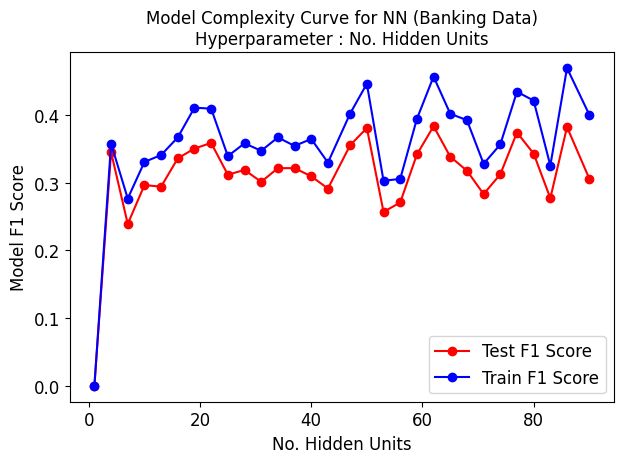

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.1

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 5, 'learning_rate_init': 0.01}
Iteration 1, loss = 0.41840333
Iteration 2, loss = 0.34394201
Iteration 1, loss = 0.41814265
Iteration 3, loss = 0.32920225
Iteration 2, loss = 0.34368830
Iteration 4, loss = 0.32846976
Iteration 3, loss = 0.32978133
Iteration 5, loss = 0.32592796
Iteration 6, loss = 0.32099280
Iteration 4, loss = 0.32841086
Iteration 7, loss = 0.31657918
Iteration 5, loss = 0.32530502
Iteration 8, loss = 0.31207478
Iteration 6, loss = 0.32044546
Iteration 9, loss = 0.30635887
Iteration 7, loss = 0.31625890
Iteration 10, loss = 0.30179150
Iteration 8, loss = 0.31155263
Iteration 11, loss = 0.29630361
Iteration 9, loss = 0.30578443
Iteration 12, loss = 0.29196475
Iteration 10, loss = 0.30088891
Iteration 13, loss = 0.28786884
Iteration 11, loss = 0.29527240
Iteration 14, loss = 0.28426659
Iteration 12, loss = 0.29079363
Iteration 15, loss = 0.28108950
Iteration 13, loss = 0.28704756
Iteration 16, loss =

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.26250488
Iteration 9, loss = 0.30404426
Iteration 30, loss = 0.26159534
Iteration 31, loss = 0.26365265
Iteration 32, loss = 0.26091074
Iteration 10, loss = 0.29817044
Iteration 33, loss = 0.26129152
Iteration 34, loss = 0.26247201
Iteration 11, loss = 0.29315749
Iteration 35, loss = 0.26019474
Iteration 36, loss = 0.25887561
Iteration 37, loss = 0.25843247
Iteration 12, loss = 0.28869422
Iteration 38, loss = 0.25811222
Iteration 39, loss = 0.25838528
Iteration 13, loss = 0.28451726
Iteration 40, loss = 0.25769111
Iteration 41, loss = 0.25735762
Iteration 14, loss = 0.28092402
Iteration 42, loss = 0.25684461
Iteration 43, loss = 0.25644676
Iteration 15, loss = 0.27769594
Iteration 44, loss = 0.25617867
Iteration 16, loss = 0.27508465Iteration 45, loss = 0.25597264

Iteration 46, loss = 0.25494572
Iteration 47, loss = 0.25527522
Iteration 48, loss = 0.25450299
Iteration 17, loss = 0.27241787
Iteration 49, loss = 0.25396214
Iteration 18, loss = 0.26973840
Iteration

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.27265396
Iteration 193, loss = 0.19335830
Iteration 18, loss = 0.27041487
Iteration 194, loss = 0.19271516
Iteration 19, loss = 0.26895105
Iteration 195, loss = 0.19267890
Iteration 20, loss = 0.26742017
Iteration 196, loss = 0.19195923
Iteration 21, loss = 0.26523261
Iteration 197, loss = 0.19174321
Iteration 22, loss = 0.26499566
Iteration 198, loss = 0.19125578
Iteration 23, loss = 0.26358816
Iteration 199, loss = 0.19149823
Iteration 24, loss = 0.26188898
Iteration 200, loss = 0.19083318
Iteration 25, loss = 0.26128352
Iteration 26, loss = 0.26021690
Iteration 27, loss = 0.25946421
Iteration 28, loss = 0.25879827
Iteration 29, loss = 0.25786809
Iteration 1, loss = 0.41977444
Iteration 30, loss = 0.25687256
Iteration 2, loss = 0.34501295
Iteration 31, loss = 0.25711631
Iteration 3, loss = 0.32776995
Iteration 32, loss = 0.25602424
Iteration 4, loss = 0.32698731
Iteration 33, loss = 0.25587912
Iteration 5, loss = 0.32445738
Iteration 34, loss = 0.25750315
Itera

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.30467075
Iteration 10, loss = 0.29919742
Iteration 194, loss = 0.18427068
Iteration 11, loss = 0.29388898
Iteration 12, loss = 0.28953707
Iteration 195, loss = 0.18489298
Iteration 13, loss = 0.28544080
Iteration 14, loss = 0.28201571
Iteration 196, loss = 0.18362157
Iteration 15, loss = 0.27863220
Iteration 197, loss = 0.18324833
Iteration 16, loss = 0.27601903
Iteration 17, loss = 0.27350239
Iteration 198, loss = 0.18302622
Iteration 199, loss = 0.18307149
Iteration 18, loss = 0.27127044
Iteration 200, loss = 0.18275584
Iteration 19, loss = 0.26923572
Iteration 20, loss = 0.26766007
Iteration 21, loss = 0.26572921
Iteration 22, loss = 0.26426817
Iteration 23, loss = 0.26320683
Iteration 1, loss = 0.41998381
Iteration 2, loss = 0.34572781
Iteration 24, loss = 0.26274793
Iteration 25, loss = 0.26092751
Iteration 3, loss = 0.32782257
Iteration 26, loss = 0.26022829
Iteration 27, loss = 0.25935338
Iteration 4, loss = 0.32636598
Iteration 28, loss = 0.25842074
Iterat

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.25738886
Iteration 21, loss = 0.25850775
Iteration 25, loss = 0.25541502
Iteration 22, loss = 0.25724049
Iteration 26, loss = 0.25535077
Iteration 23, loss = 0.25531067
Iteration 27, loss = 0.25345806
Iteration 24, loss = 0.25495155
Iteration 25, loss = 0.25330420
Iteration 28, loss = 0.25314891
Iteration 26, loss = 0.25248721
Iteration 29, loss = 0.25191636
Iteration 27, loss = 0.25107350
Iteration 30, loss = 0.25135403
Iteration 28, loss = 0.25108467
Iteration 31, loss = 0.25112551
Iteration 29, loss = 0.24961533
Iteration 32, loss = 0.25005931
Iteration 30, loss = 0.24908022
Iteration 33, loss = 0.25000733
Iteration 31, loss = 0.24862097
Iteration 34, loss = 0.24984480
Iteration 32, loss = 0.24877497
Iteration 33, loss = 0.24776598
Iteration 35, loss = 0.24970532
Iteration 34, loss = 0.24685695
Iteration 36, loss = 0.24827731
Iteration 35, loss = 0.24738340
Iteration 37, loss = 0.24850978
Iteration 36, loss = 0.24586139
Iteration 37, loss = 0.24630594Iteration

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.39039072
Iteration 1, loss = 0.39077560
Iteration 2, loss = 0.33359530
Iteration 2, loss = 0.33355544
Iteration 3, loss = 0.32698875
Iteration 3, loss = 0.32657400
Iteration 4, loss = 0.31580564
Iteration 4, loss = 0.31571222
Iteration 5, loss = 0.30390084
Iteration 5, loss = 0.30304375
Iteration 6, loss = 0.29337534
Iteration 6, loss = 0.29214376
Iteration 7, loss = 0.28556735
Iteration 7, loss = 0.28398273
Iteration 8, loss = 0.27935067
Iteration 8, loss = 0.27775639
Iteration 9, loss = 0.27477676
Iteration 9, loss = 0.27299013
Iteration 10, loss = 0.27155273
Iteration 10, loss = 0.26969692
Iteration 11, loss = 0.26874764
Iteration 11, loss = 0.26660952
Iteration 12, loss = 0.26677880
Iteration 12, loss = 0.26489259
Iteration 13, loss = 0.26498645
Iteration 13, loss = 0.26303188
Iteration 14, loss = 0.26405495
Iteration 14, loss = 0.26181258
Iteration 15, loss = 0.26305377
Iteration 15, loss = 0.26054695
Iteration 16, loss = 0.26189133
Iteration 16, loss = 0.259

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.26131657
Iteration 6, loss = 0.29473801
Iteration 16, loss = 0.26052217
Iteration 7, loss = 0.28660203
Iteration 17, loss = 0.25964160
Iteration 8, loss = 0.28047077
Iteration 9, loss = 0.27623805
Iteration 18, loss = 0.25897106
Iteration 10, loss = 0.27264505
Iteration 11, loss = 0.26992194
Iteration 19, loss = 0.25834803
Iteration 12, loss = 0.26795549
Iteration 13, loss = 0.26602350
Iteration 14, loss = 0.26496143
Iteration 20, loss = 0.25782593
Iteration 15, loss = 0.26378460
Iteration 16, loss = 0.26336147
Iteration 17, loss = 0.26209332
Iteration 21, loss = 0.25765691
Iteration 18, loss = 0.26176644
Iteration 22, loss = 0.25740840
Iteration 19, loss = 0.26137696
Iteration 23, loss = 0.25681740
Iteration 24, loss = 0.25688375
Iteration 20, loss = 0.26070119Iteration 25, loss = 0.25620857

Iteration 26, loss = 0.25677669
Iteration 27, loss = 0.25566592
Iteration 21, loss = 0.26035772
Iteration 22, loss = 0.26046512Iteration 28, loss = 0.25522811

Iteration 29

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 190, loss = 0.22006653
Iteration 191, loss = 0.22001142
Iteration 192, loss = 0.22006147
Iteration 1, loss = 0.38611524
Iteration 193, loss = 0.22015092
Iteration 2, loss = 0.33516992
Iteration 194, loss = 0.21947941
Iteration 3, loss = 0.32683164
Iteration 195, loss = 0.21921637
Iteration 4, loss = 0.31429402
Iteration 196, loss = 0.21880739
Iteration 5, loss = 0.30217911
Iteration 197, loss = 0.21871227
Iteration 6, loss = 0.29104247
Iteration 198, loss = 0.21847035
Iteration 7, loss = 0.28232622
Iteration 199, loss = 0.21836317
Iteration 8, loss = 0.27568737
Iteration 9, loss = 0.27071283
Iteration 10, loss = 0.26699455
Iteration 200, loss = 0.21821212
Iteration 11, loss = 0.26519298
Iteration 1, loss = 0.38509188
Iteration 12, loss = 0.26371978
Iteration 2, loss = 0.33541514
Iteration 13, loss = 0.26072812
Iteration 3, loss = 0.32737113
Iteration 14, loss = 0.25935487
Iteration 4, loss = 0.31567146
Iteration 15, loss = 0.25808315
Iteration 5, loss = 0.30348722
Iteration 1

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 199, loss = 0.21219005
Iteration 200, loss = 0.21278953
Iteration 5, loss = 0.30118716
Iteration 6, loss = 0.28967880
Iteration 7, loss = 0.28137415
Iteration 8, loss = 0.27481572Iteration 1, loss = 0.38621108

Iteration 9, loss = 0.27067518
Iteration 2, loss = 0.33537363
Iteration 10, loss = 0.26681114
Iteration 3, loss = 0.32628674
Iteration 11, loss = 0.26436659
Iteration 4, loss = 0.31319277
Iteration 12, loss = 0.26332563
Iteration 5, loss = 0.30039331
Iteration 13, loss = 0.26070248
Iteration 6, loss = 0.28824616
Iteration 14, loss = 0.25901982
Iteration 7, loss = 0.27963328
Iteration 15, loss = 0.25792296
Iteration 8, loss = 0.27258958
Iteration 16, loss = 0.25690903
Iteration 9, loss = 0.26848341
Iteration 17, loss = 0.25608586
Iteration 10, loss = 0.26448718
Iteration 18, loss = 0.25537465
Iteration 11, loss = 0.26178921
Iteration 19, loss = 0.25449669
Iteration 12, loss = 0.25985989
Iteration 20, loss = 0.25451733
Iteration 13, loss = 0.25766296
Iteration 21, loss =

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 193, loss = 0.20716472
Iteration 8, loss = 0.27697898
Iteration 194, loss = 0.20797816
Iteration 9, loss = 0.27264211
Iteration 195, loss = 0.20690074
Iteration 10, loss = 0.26896078
Iteration 196, loss = 0.20636533
Iteration 11, loss = 0.26654866
Iteration 197, loss = 0.20624524
Iteration 12, loss = 0.26508465
Iteration 198, loss = 0.20657656
Iteration 13, loss = 0.26324671
Iteration 199, loss = 0.20616925
Iteration 14, loss = 0.26173899
Iteration 200, loss = 0.20655325
Iteration 15, loss = 0.26112224
Iteration 16, loss = 0.26001468
Iteration 17, loss = 0.25900603
Iteration 1, loss = 0.38671330
Iteration 18, loss = 0.25848832
Iteration 19, loss = 0.25765003
Iteration 2, loss = 0.33538060
Iteration 20, loss = 0.25759051
Iteration 3, loss = 0.32622347
Iteration 21, loss = 0.25693576
Iteration 4, loss = 0.31386609
Iteration 22, loss = 0.25695517Iteration 5, loss = 0.30094679

Iteration 23, loss = 0.25605178
Iteration 6, loss = 0.28908080
Iteration 7, loss = 0.28028067
Iteration

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 195, loss = 0.20939903
Iteration 196, loss = 0.20878770
Iteration 197, loss = 0.20871099
Iteration 198, loss = 0.20859117
Iteration 199, loss = 0.20836730
Iteration 200, loss = 0.20846984
Iteration 1, loss = 0.36860705
Iteration 2, loss = 0.32900367
Iteration 1, loss = 0.36892552
Iteration 3, loss = 0.31640025
Iteration 2, loss = 0.32933481
Iteration 4, loss = 0.30430665
Iteration 3, loss = 0.31661902
Iteration 4, loss = 0.30352845
Iteration 5, loss = 0.29403032
Iteration 5, loss = 0.29235853
Iteration 6, loss = 0.28790837
Iteration 6, loss = 0.28556069
Iteration 7, loss = 0.28076160
Iteration 7, loss = 0.28363490
Iteration 8, loss = 0.27797557
Iteration 9, loss = 0.27527968
Iteration 8, loss = 0.28104785
Iteration 9, loss = 0.27882110
Iteration 10, loss = 0.27750158
Iteration 11, loss = 0.27612390
Iteration 10, loss = 0.27440883
Iteration 12, loss = 0.27452896
Iteration 11, loss = 0.27239851Iteration 13, loss = 0.27465535

Iteration 14, loss = 0.27348047
Iteration 15, loss =

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 190, loss = 0.23826317
Iteration 4, loss = 0.30320875
Iteration 5, loss = 0.29254681
Iteration 191, loss = 0.23808972
Iteration 6, loss = 0.28613612
Iteration 192, loss = 0.23829932
Iteration 7, loss = 0.28144636
Iteration 193, loss = 0.23825356
Iteration 8, loss = 0.27898933
Iteration 9, loss = 0.27643739
Iteration 194, loss = 0.23764261
Iteration 10, loss = 0.27509162
Iteration 195, loss = 0.23760227
Iteration 11, loss = 0.27341276
Iteration 12, loss = 0.27248232
Iteration 196, loss = 0.23782682
Iteration 13, loss = 0.27149883
Iteration 197, loss = 0.23769613
Iteration 14, loss = 0.27130534
Iteration 198, loss = 0.23722377
Iteration 15, loss = 0.27028864
Iteration 16, loss = 0.26939233
Iteration 199, loss = 0.23755975
Iteration 17, loss = 0.26933176
Iteration 18, loss = 0.26833682
Iteration 200, loss = 0.23746095
Iteration 19, loss = 0.26824600
Iteration 20, loss = 0.26818217
Iteration 21, loss = 0.26762451
Iteration 22, loss = 0.26708652
Iteration 23, loss = 0.26731212
It

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.26477856
Iteration 7, loss = 0.27891026
Iteration 35, loss = 0.26406981
Iteration 8, loss = 0.27622262
Iteration 36, loss = 0.26385182
Iteration 9, loss = 0.27314058
Iteration 37, loss = 0.26366436
Iteration 10, loss = 0.27154521
Iteration 38, loss = 0.26361937
Iteration 11, loss = 0.27005384
Iteration 39, loss = 0.26387653
Iteration 12, loss = 0.26824930
Iteration 40, loss = 0.26361459
Iteration 13, loss = 0.26772279
Iteration 41, loss = 0.26266497
Iteration 14, loss = 0.26781217
Iteration 42, loss = 0.26218959
Iteration 15, loss = 0.26682474
Iteration 16, loss = 0.26556293
Iteration 43, loss = 0.26218287
Iteration 17, loss = 0.26519531
Iteration 44, loss = 0.26251866
Iteration 45, loss = 0.26255691
Iteration 18, loss = 0.26484339
Iteration 46, loss = 0.26160297
Iteration 19, loss = 0.26440603
Iteration 47, loss = 0.26159940
Iteration 48, loss = 0.26102213
Iteration 20, loss = 0.26501610
Iteration 49, loss = 0.26071745
Iteration 21, loss = 0.26421260
Iteration 5

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 169, loss = 0.23437582
Iteration 170, loss = 0.23375341
Iteration 1, loss = 0.36906012
Iteration 171, loss = 0.23374098
Iteration 2, loss = 0.32870357
Iteration 172, loss = 0.23382330
Iteration 173, loss = 0.23345710
Iteration 3, loss = 0.31570882
Iteration 174, loss = 0.23336090
Iteration 4, loss = 0.30218840
Iteration 175, loss = 0.23286009
Iteration 5, loss = 0.29152124
Iteration 176, loss = 0.23287669
Iteration 6, loss = 0.28478211
Iteration 177, loss = 0.23343758
Iteration 7, loss = 0.28030286
Iteration 178, loss = 0.23225683
Iteration 8, loss = 0.27759156
Iteration 179, loss = 0.23183706
Iteration 9, loss = 0.27456467
Iteration 180, loss = 0.23281524
Iteration 10, loss = 0.27312309
Iteration 181, loss = 0.23199289
Iteration 182, loss = 0.23196458
Iteration 11, loss = 0.27187005
Iteration 183, loss = 0.23197840
Iteration 12, loss = 0.26987264
Iteration 184, loss = 0.23123390
Iteration 13, loss = 0.26945435
Iteration 185, loss = 0.23107181
Iteration 14, loss = 0.26910934


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.26182489
Iteration 1, loss = 0.36904628
Iteration 34, loss = 0.26196673
Iteration 35, loss = 0.26167802
Iteration 2, loss = 0.33001613
Iteration 36, loss = 0.26150209
Iteration 37, loss = 0.26144168
Iteration 3, loss = 0.31912843
Iteration 4, loss = 0.30724307
Iteration 38, loss = 0.26096141
Iteration 5, loss = 0.29743245
Iteration 39, loss = 0.26088401
Iteration 6, loss = 0.29116786
Iteration 40, loss = 0.26102547
Iteration 7, loss = 0.28693561
Iteration 41, loss = 0.26001860
Iteration 8, loss = 0.28380833
Iteration 42, loss = 0.25987099
Iteration 9, loss = 0.28136250
Iteration 43, loss = 0.25969471
Iteration 10, loss = 0.27951611
Iteration 44, loss = 0.25969031
Iteration 11, loss = 0.27858780
Iteration 45, loss = 0.25965593
Iteration 12, loss = 0.27643153
Iteration 46, loss = 0.25894640
Iteration 13, loss = 0.27615939
Iteration 47, loss = 0.25980468
Iteration 14, loss = 0.27571168
Iteration 48, loss = 0.25848077
Iteration 15, loss = 0.27485449
Iteration 49, los

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.26971631
Iteration 168, loss = 0.24437446
Iteration 15, loss = 0.26872438
Iteration 169, loss = 0.24416577
Iteration 170, loss = 0.24432221
Iteration 16, loss = 0.26823666
Iteration 171, loss = 0.24414292
Iteration 17, loss = 0.26751911
Iteration 172, loss = 0.24437659
Iteration 18, loss = 0.26763367
Iteration 173, loss = 0.24386387
Iteration 19, loss = 0.26713101
Iteration 174, loss = 0.24366284
Iteration 20, loss = 0.26717111
Iteration 175, loss = 0.24396705
Iteration 21, loss = 0.26753829
Iteration 176, loss = 0.24339960
Iteration 22, loss = 0.26608193
Iteration 177, loss = 0.24327127
Iteration 178, loss = 0.24318246
Iteration 23, loss = 0.26552900
Iteration 179, loss = 0.24318245
Iteration 24, loss = 0.26558035
Iteration 180, loss = 0.24411031
Iteration 25, loss = 0.26509465
Iteration 181, loss = 0.24300262
Iteration 26, loss = 0.26506580
Iteration 182, loss = 0.24282835
Iteration 27, loss = 0.26524808
Iteration 183, loss = 0.24257915
Iteration 28, loss = 0.2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.25940112
Iteration 3, loss = 0.31673233
Iteration 50, loss = 0.25903021
Iteration 4, loss = 0.30362141
Iteration 51, loss = 0.25909618
Iteration 5, loss = 0.29263179
Iteration 52, loss = 0.25859230
Iteration 6, loss = 0.28616844
Iteration 53, loss = 0.25829413
Iteration 7, loss = 0.28138855
Iteration 54, loss = 0.26003683
Iteration 8, loss = 0.27840354
Iteration 55, loss = 0.25814840
Iteration 9, loss = 0.27601990
Iteration 56, loss = 0.25742102
Iteration 10, loss = 0.27460701
Iteration 57, loss = 0.25725781
Iteration 11, loss = 0.27253205
Iteration 58, loss = 0.25698908
Iteration 12, loss = 0.27161547
Iteration 59, loss = 0.25710696
Iteration 13, loss = 0.27055636
Iteration 60, loss = 0.25688547
Iteration 14, loss = 0.27058168
Iteration 61, loss = 0.25668450
Iteration 15, loss = 0.26928211
Iteration 62, loss = 0.25637457
Iteration 16, loss = 0.26897155
Iteration 63, loss = 0.25594350
Iteration 17, loss = 0.26822457
Iteration 64, loss = 0.25545599
Iteration 18, l

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 167, loss = 0.23775866
Iteration 11, loss = 0.27248044
Iteration 168, loss = 0.23740511
Iteration 12, loss = 0.27103332
Iteration 13, loss = 0.27021701
Iteration 169, loss = 0.23714322
Iteration 14, loss = 0.26975338
Iteration 170, loss = 0.23757813
Iteration 15, loss = 0.26866062Iteration 171, loss = 0.23747000

Iteration 172, loss = 0.23712461
Iteration 16, loss = 0.26814654
Iteration 173, loss = 0.23705609
Iteration 17, loss = 0.26741005
Iteration 174, loss = 0.23679199
Iteration 18, loss = 0.26722406
Iteration 19, loss = 0.26662940
Iteration 175, loss = 0.23659421
Iteration 20, loss = 0.26630506
Iteration 176, loss = 0.23664703
Iteration 21, loss = 0.26587744
Iteration 177, loss = 0.23640836
Iteration 22, loss = 0.26536622
Iteration 178, loss = 0.23670624
Iteration 23, loss = 0.26507337
Iteration 179, loss = 0.23616621
Iteration 24, loss = 0.26499887Iteration 180, loss = 0.23663408

Iteration 181, loss = 0.23643074
Iteration 25, loss = 0.26472580
Iteration 182, loss = 0.2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.32909498
Iteration 48, loss = 0.26067726
Iteration 3, loss = 0.31651493
Iteration 49, loss = 0.25999806
Iteration 4, loss = 0.30287050
Iteration 5, loss = 0.29215113Iteration 50, loss = 0.25918229

Iteration 6, loss = 0.28543176
Iteration 51, loss = 0.25887627
Iteration 7, loss = 0.28119470
Iteration 52, loss = 0.25882238
Iteration 8, loss = 0.27764893
Iteration 53, loss = 0.25853396
Iteration 9, loss = 0.27546412
Iteration 10, loss = 0.27434724
Iteration 54, loss = 0.25914674
Iteration 55, loss = 0.25859519
Iteration 11, loss = 0.27239797
Iteration 56, loss = 0.25746488
Iteration 12, loss = 0.27075204
Iteration 13, loss = 0.27006284
Iteration 57, loss = 0.25768367
Iteration 14, loss = 0.26942207
Iteration 58, loss = 0.25704286
Iteration 15, loss = 0.26852583
Iteration 59, loss = 0.25709887
Iteration 16, loss = 0.26849103
Iteration 60, loss = 0.25710429
Iteration 17, loss = 0.26740614
Iteration 61, loss = 0.25626271
Iteration 18, loss = 0.26702052
Iteration 62, lo

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37687530
Iteration 2, loss = 0.33995049
Iteration 1, loss = 0.37728711
Iteration 3, loss = 0.31897479
Iteration 2, loss = 0.34074795
Iteration 4, loss = 0.30378526
Iteration 3, loss = 0.32066170
Iteration 5, loss = 0.29551208
Iteration 4, loss = 0.30602473
Iteration 6, loss = 0.29047954
Iteration 5, loss = 0.29795121
Iteration 7, loss = 0.28782884
Iteration 8, loss = 0.28598585
Iteration 6, loss = 0.29338977
Iteration 7, loss = 0.29095387
Iteration 9, loss = 0.28448448
Iteration 8, loss = 0.28854655
Iteration 10, loss = 0.28367094
Iteration 11, loss = 0.28246406
Iteration 9, loss = 0.28727459
Iteration 12, loss = 0.28263187
Iteration 13, loss = 0.28198505
Iteration 10, loss = 0.28637102
Iteration 14, loss = 0.28142449
Iteration 15, loss = 0.28062085
Iteration 11, loss = 0.28612232
Iteration 16, loss = 0.28064454
Iteration 12, loss = 0.28548727
Iteration 13, loss = 0.28467128
Iteration 17, loss = 0.28002415
Iteration 14, loss = 0.28477566
Iteration 18, loss = 0.279

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.28512245
Iteration 11, loss = 0.28460769
Iteration 46, loss = 0.27614589
Iteration 47, loss = 0.27593563
Iteration 12, loss = 0.28386239
Iteration 48, loss = 0.27498421
Iteration 49, loss = 0.27483915
Iteration 13, loss = 0.28365869
Iteration 50, loss = 0.27467803
Iteration 14, loss = 0.28334024
Iteration 15, loss = 0.28258072
Iteration 51, loss = 0.27445864
Iteration 16, loss = 0.28200645
Iteration 17, loss = 0.28169270
Iteration 18, loss = 0.28189417
Iteration 52, loss = 0.27460102
Iteration 19, loss = 0.28137612
Iteration 20, loss = 0.28084750
Iteration 21, loss = 0.28138811
Iteration 22, loss = 0.28058996Iteration 53, loss = 0.27391029

Iteration 23, loss = 0.28027111
Iteration 54, loss = 0.27390731
Iteration 24, loss = 0.28050529Iteration 55, loss = 0.27336885

Iteration 25, loss = 0.28070259Iteration 56, loss = 0.27281640

Iteration 57, loss = 0.27280258
Iteration 26, loss = 0.27926102
Iteration 27, loss = 0.28004588
Iteration 58, loss = 0.27224500
Iteratio

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 178, loss = 0.25475233
Iteration 1, loss = 0.37678095
Iteration 179, loss = 0.25378678
Iteration 2, loss = 0.34152203
Iteration 180, loss = 0.25400601
Iteration 181, loss = 0.25391810
Iteration 3, loss = 0.32069966
Iteration 182, loss = 0.25420502
Iteration 4, loss = 0.30603909
Iteration 183, loss = 0.25446333
Iteration 5, loss = 0.29794327
Iteration 184, loss = 0.25351692
Iteration 6, loss = 0.29321904
Iteration 185, loss = 0.25346661
Iteration 7, loss = 0.29076588
Iteration 186, loss = 0.25340963
Iteration 8, loss = 0.28847714
Iteration 187, loss = 0.25335514
Iteration 9, loss = 0.28689389
Iteration 188, loss = 0.25324167
Iteration 10, loss = 0.28570694
Iteration 189, loss = 0.25331045
Iteration 11, loss = 0.28561350
Iteration 190, loss = 0.25362080
Iteration 12, loss = 0.28454747
Iteration 191, loss = 0.25317196
Iteration 192, loss = 0.25289032
Iteration 13, loss = 0.28463256
Iteration 193, loss = 0.25297291
Iteration 14, loss = 0.28389014
Iteration 194, loss = 0.25318635


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.30195034
Iteration 26, loss = 0.28035153
Iteration 5, loss = 0.29309483
Iteration 27, loss = 0.28086004
Iteration 6, loss = 0.28788325
Iteration 28, loss = 0.27995330
Iteration 7, loss = 0.28512701
Iteration 29, loss = 0.27941615
Iteration 8, loss = 0.28243569
Iteration 30, loss = 0.27948067
Iteration 9, loss = 0.28106984
Iteration 31, loss = 0.27882457
Iteration 10, loss = 0.27965616
Iteration 32, loss = 0.27867035
Iteration 11, loss = 0.27916177
Iteration 33, loss = 0.27833361
Iteration 12, loss = 0.27801660
Iteration 34, loss = 0.27822131
Iteration 13, loss = 0.27875255
Iteration 35, loss = 0.27826106
Iteration 14, loss = 0.27771857
Iteration 36, loss = 0.27775280
Iteration 15, loss = 0.27689212
Iteration 37, loss = 0.27773137
Iteration 16, loss = 0.27691191
Iteration 38, loss = 0.27669488
Iteration 17, loss = 0.27644141
Iteration 39, loss = 0.27695606
Iteration 18, loss = 0.27698909
Iteration 19, loss = 0.27626019
Iteration 20, loss = 0.27559092
Iteration 40, 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 194, loss = 0.24326771
Iteration 8, loss = 0.28767747
Iteration 195, loss = 0.24294984
Iteration 9, loss = 0.28617733
Iteration 196, loss = 0.24289636
Iteration 10, loss = 0.28496036
Iteration 197, loss = 0.24253072
Iteration 11, loss = 0.28503280
Iteration 198, loss = 0.24373001
Iteration 12, loss = 0.28381684
Iteration 199, loss = 0.24369834
Iteration 13, loss = 0.28433035
Iteration 200, loss = 0.24291645
Iteration 14, loss = 0.28325870
Iteration 15, loss = 0.28277993
Iteration 16, loss = 0.28259970
Iteration 1, loss = 0.37596449
Iteration 17, loss = 0.28223166
Iteration 2, loss = 0.34031667
Iteration 18, loss = 0.28323055
Iteration 3, loss = 0.31943640
Iteration 19, loss = 0.28205693
Iteration 4, loss = 0.30444975
Iteration 20, loss = 0.28144107
Iteration 5, loss = 0.29753565
Iteration 21, loss = 0.28198956
Iteration 6, loss = 0.29229146


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.28138461
Iteration 7, loss = 0.28951068
Iteration 23, loss = 0.28141930
Iteration 8, loss = 0.28751293
Iteration 24, loss = 0.28080519
Iteration 9, loss = 0.28621753
Iteration 25, loss = 0.28013097
Iteration 10, loss = 0.28527326
Iteration 26, loss = 0.27995583
Iteration 11, loss = 0.28484003
Iteration 27, loss = 0.28039083
Iteration 12, loss = 0.28382639
Iteration 28, loss = 0.27955968
Iteration 13, loss = 0.28417472
Iteration 29, loss = 0.27967531
Iteration 14, loss = 0.28313262
Iteration 30, loss = 0.27929455
Iteration 15, loss = 0.28269007
Iteration 31, loss = 0.27847522
Iteration 16, loss = 0.28263510
Iteration 32, loss = 0.27916123
Iteration 17, loss = 0.28195088
Iteration 33, loss = 0.27868283
Iteration 18, loss = 0.28270725
Iteration 34, loss = 0.27811635
Iteration 19, loss = 0.28179351
Iteration 35, loss = 0.27750969
Iteration 20, loss = 0.28132855
Iteration 36, loss = 0.27781063
Iteration 21, loss = 0.28255001
Iteration 37, loss = 0.27718698
Iteration 2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.28652392
Iteration 190, loss = 0.25302400
Iteration 9, loss = 0.28523322
Iteration 191, loss = 0.25377351
Iteration 10, loss = 0.28442534
Iteration 192, loss = 0.25251634
Iteration 193, loss = 0.25245643
Iteration 194, loss = 0.25269223
Iteration 11, loss = 0.28384687
Iteration 12, loss = 0.28284396
Iteration 13, loss = 0.28315661
Iteration 195, loss = 0.25247099
Iteration 14, loss = 0.28184939
Iteration 196, loss = 0.25278077
Iteration 15, loss = 0.28199583
Iteration 197, loss = 0.25296263
Iteration 16, loss = 0.28151043
Iteration 17, loss = 0.28092868
Iteration 198, loss = 0.25223500
Iteration 18, loss = 0.28154372
Iteration 19, loss = 0.28079098
Iteration 199, loss = 0.25245931
Iteration 20, loss = 0.28060259
Iteration 200, loss = 0.25221894
Iteration 21, loss = 0.28141374
Iteration 22, loss = 0.28018395Iteration 1, loss = 0.37749010

Iteration 2, loss = 0.34166351
Iteration 3, loss = 0.32130727
Iteration 23, loss = 0.28021831
Iteration 4, loss = 0.30652185
Ite

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.28417885
Iteration 30, loss = 0.27852294
Iteration 13, loss = 0.28348263
Iteration 31, loss = 0.27735628
Iteration 14, loss = 0.28343939
Iteration 32, loss = 0.27803025
Iteration 15, loss = 0.28244314
Iteration 33, loss = 0.27721095
Iteration 16, loss = 0.28221617
Iteration 34, loss = 0.27717255
Iteration 17, loss = 0.28304671
Iteration 35, loss = 0.27709339
Iteration 18, loss = 0.28229860
Iteration 36, loss = 0.27676088
Iteration 19, loss = 0.28184428
Iteration 37, loss = 0.27591097
Iteration 20, loss = 0.28167389
Iteration 21, loss = 0.28149936
Iteration 38, loss = 0.27581908
Iteration 22, loss = 0.28101673
Iteration 23, loss = 0.28066327Iteration 39, loss = 0.27498438

Iteration 24, loss = 0.28015341
Iteration 40, loss = 0.27476557
Iteration 25, loss = 0.27987353
Iteration 41, loss = 0.27457104
Iteration 26, loss = 0.27951143
Iteration 42, loss = 0.27467227
Iteration 27, loss = 0.28010903
Iteration 43, loss = 0.27403079
Iteration 44, loss = 0.27330069
Iteratio

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37136941
Iteration 1, loss = 0.37195291
Iteration 2, loss = 0.33432819
Iteration 3, loss = 0.31376969
Iteration 2, loss = 0.33445471
Iteration 4, loss = 0.30196535
Iteration 3, loss = 0.31278524
Iteration 5, loss = 0.29561224
Iteration 4, loss = 0.30024108
Iteration 6, loss = 0.29148539
Iteration 5, loss = 0.29301827
Iteration 7, loss = 0.28986558
Iteration 6, loss = 0.29000015
Iteration 8, loss = 0.28855298
Iteration 7, loss = 0.28699711
Iteration 9, loss = 0.28681137
Iteration 8, loss = 0.28593514
Iteration 10, loss = 0.28671653
Iteration 9, loss = 0.28502284
Iteration 11, loss = 0.28618797
Iteration 10, loss = 0.28407555
Iteration 12, loss = 0.28590156
Iteration 11, loss = 0.28357526
Iteration 12, loss = 0.28320408
Iteration 13, loss = 0.28588643
Iteration 14, loss = 0.28531618
Iteration 15, loss = 0.28454651
Iteration 13, loss = 0.28350384Iteration 16, loss = 0.28413208

Iteration 17, loss = 0.28404133Iteration 14, loss = 0.28275652

Iteration 15, loss = 0.281

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.31471080
Iteration 4, loss = 0.30286183
Iteration 1, loss = 0.37319083
Iteration 5, loss = 0.29596653
Iteration 2, loss = 0.33482910
Iteration 6, loss = 0.29304128
Iteration 3, loss = 0.31374112
Iteration 7, loss = 0.29017060
Iteration 8, loss = 0.28886690
Iteration 4, loss = 0.30153859
Iteration 9, loss = 0.28775163
Iteration 5, loss = 0.29505992
Iteration 10, loss = 0.28694365
Iteration 11, loss = 0.28638237
Iteration 6, loss = 0.29158911
Iteration 7, loss = 0.28897022
Iteration 12, loss = 0.28609315
Iteration 13, loss = 0.28722563
Iteration 8, loss = 0.28793176
Iteration 9, loss = 0.28698905
Iteration 14, loss = 0.28522065
Iteration 10, loss = 0.28562688
Iteration 15, loss = 0.28472891
Iteration 11, loss = 0.28546375
Iteration 16, loss = 0.28404662
Iteration 12, loss = 0.28517454
Iteration 17, loss = 0.28407279
Iteration 13, loss = 0.28447997
Iteration 18, loss = 0.28323211
Iteration 14, loss = 0.28393293
Iteration 19, loss = 0.28342779
Iteration 15, loss = 0.2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.37372976
Iteration 2, loss = 0.33604119
Iteration 1, loss = 0.37244053
Iteration 3, loss = 0.31536011
Iteration 2, loss = 0.33453474
Iteration 4, loss = 0.30319822
Iteration 3, loss = 0.31424152
Iteration 5, loss = 0.29680831
Iteration 4, loss = 0.30232483
Iteration 5, loss = 0.29648742
Iteration 6, loss = 0.29286844
Iteration 6, loss = 0.29266883
Iteration 7, loss = 0.29044086
Iteration 7, loss = 0.29040354
Iteration 8, loss = 0.28963882
Iteration 8, loss = 0.28947563
Iteration 9, loss = 0.28812781
Iteration 9, loss = 0.28853107
Iteration 10, loss = 0.28705427
Iteration 10, loss = 0.28764394
Iteration 11, loss = 0.28670678
Iteration 11, loss = 0.28648706
Iteration 12, loss = 0.28646826
Iteration 13, loss = 0.28528819
Iteration 12, loss = 0.28612034
Iteration 14, loss = 0.28516898
Iteration 15, loss = 0.28500965
Iteration 13, loss = 0.28531347
Iteration 16, loss = 0.28352439
Iteration 14, loss = 0.28523418
Iteration 17, loss = 0.28457755
Iteration 18, loss = 0.284

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 198, loss = 0.25501312
Iteration 199, loss = 0.25526945
Iteration 1, loss = 0.37184189
Iteration 200, loss = 0.25448890
Iteration 2, loss = 0.33445959
Iteration 3, loss = 0.31402745
Iteration 4, loss = 0.30195230
Iteration 1, loss = 0.37096339
Iteration 5, loss = 0.29610719
Iteration 2, loss = 0.33453903
Iteration 6, loss = 0.29197879
Iteration 3, loss = 0.31468833
Iteration 7, loss = 0.28967990
Iteration 4, loss = 0.30272830
Iteration 8, loss = 0.28865259
Iteration 5, loss = 0.29653723
Iteration 9, loss = 0.28720904
Iteration 6, loss = 0.29270179
Iteration 10, loss = 0.28652218
Iteration 7, loss = 0.29066393
Iteration 11, loss = 0.28575774
Iteration 8, loss = 0.28935348
Iteration 12, loss = 0.28587909
Iteration 9, loss = 0.28765382
Iteration 13, loss = 0.28498669
Iteration 10, loss = 0.28748680
Iteration 14, loss = 0.28469471
Iteration 11, loss = 0.28634159
Iteration 15, loss = 0.28419361
Iteration 12, loss = 0.28629895
Iteration 16, loss = 0.28323520
Iteration 13, loss = 0.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 196, loss = 0.25547584
Iteration 1, loss = 0.37130243
Iteration 197, loss = 0.25584833
Iteration 2, loss = 0.33450152
Iteration 198, loss = 0.25577366
Iteration 3, loss = 0.31367828
Iteration 199, loss = 0.25580100
Iteration 4, loss = 0.30133212
Iteration 200, loss = 0.25562083
Iteration 5, loss = 0.29528095
Iteration 6, loss = 0.29141874
Iteration 7, loss = 0.28912793
Iteration 1, loss = 0.37103264
Iteration 8, loss = 0.28783750
Iteration 2, loss = 0.33467516
Iteration 9, loss = 0.28615337
Iteration 3, loss = 0.31349552
Iteration 10, loss = 0.28657065
Iteration 4, loss = 0.30110777
Iteration 11, loss = 0.28547811
Iteration 5, loss = 0.29517677
Iteration 12, loss = 0.28496350
Iteration 6, loss = 0.29139673
Iteration 13, loss = 0.28459240
Iteration 7, loss = 0.28921277
Iteration 14, loss = 0.28402808
Iteration 8, loss = 0.28778134
Iteration 15, loss = 0.28413101
Iteration 9, loss = 0.28630683
Iteration 16, loss = 0.28415155
Iteration 10, loss = 0.28630051
Iteration 17, loss = 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.35749962
Iteration 1, loss = 0.35792620
Iteration 2, loss = 0.31917920Iteration 2, loss = 0.32007474

Iteration 3, loss = 0.29924824
Iteration 3, loss = 0.29785349
Iteration 4, loss = 0.28790163
Iteration 4, loss = 0.28907466
Iteration 5, loss = 0.28328871
Iteration 5, loss = 0.28442640
Iteration 6, loss = 0.28079670
Iteration 6, loss = 0.28193515
Iteration 7, loss = 0.27904633
Iteration 7, loss = 0.28047259
Iteration 8, loss = 0.27795456
Iteration 8, loss = 0.27933375
Iteration 9, loss = 0.27719850
Iteration 9, loss = 0.27861237
Iteration 10, loss = 0.27719143
Iteration 10, loss = 0.27826352
Iteration 11, loss = 0.27679053
Iteration 11, loss = 0.27798500
Iteration 12, loss = 0.27649391
Iteration 12, loss = 0.27787677
Iteration 13, loss = 0.27541564
Iteration 13, loss = 0.27669580
Iteration 14, loss = 0.27592040
Iteration 14, loss = 0.27726627
Iteration 15, loss = 0.27469381
Iteration 15, loss = 0.27615210
Iteration 16, loss = 0.27446081
Iteration 16, loss = 0.275

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.27403677
Iteration 5, loss = 0.28413655
Iteration 26, loss = 0.27380558
Iteration 6, loss = 0.28185102
Iteration 27, loss = 0.27350866
Iteration 7, loss = 0.28005024
Iteration 28, loss = 0.27371319
Iteration 8, loss = 0.27919491
Iteration 29, loss = 0.27358109
Iteration 9, loss = 0.27834405
Iteration 30, loss = 0.27291223
Iteration 10, loss = 0.27796626
Iteration 31, loss = 0.27288688
Iteration 11, loss = 0.27760877
Iteration 32, loss = 0.27277219
Iteration 12, loss = 0.27725336
Iteration 33, loss = 0.27250973
Iteration 13, loss = 0.27683256
Iteration 34, loss = 0.27214703
Iteration 14, loss = 0.27654244
Iteration 35, loss = 0.27208026
Iteration 15, loss = 0.27646325
Iteration 36, loss = 0.27153211
Iteration 16, loss = 0.27620555
Iteration 37, loss = 0.27115817
Iteration 17, loss = 0.27547746
Iteration 38, loss = 0.27113902
Iteration 18, loss = 0.27523192
Iteration 39, loss = 0.27071174
Iteration 19, loss = 0.27539734
Iteration 40, loss = 0.27038464
Iteration 20,

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 184, loss = 0.25209612
Iteration 185, loss = 0.25192012
Iteration 1, loss = 0.35821156
Iteration 186, loss = 0.25277352
Iteration 2, loss = 0.31960829
Iteration 187, loss = 0.25199080
Iteration 3, loss = 0.29773423
Iteration 188, loss = 0.25216559
Iteration 4, loss = 0.28834435
Iteration 189, loss = 0.25165730
Iteration 5, loss = 0.28341446
Iteration 190, loss = 0.25218635
Iteration 6, loss = 0.28142084
Iteration 191, loss = 0.25261249
Iteration 7, loss = 0.27951323
Iteration 192, loss = 0.25192572
Iteration 8, loss = 0.27858679
Iteration 193, loss = 0.25190279
Iteration 9, loss = 0.27786350
Iteration 194, loss = 0.25189142
Iteration 10, loss = 0.27702122
Iteration 195, loss = 0.25191180
Iteration 11, loss = 0.27676199
Iteration 196, loss = 0.25183052
Iteration 197, loss = 0.25163059
Iteration 12, loss = 0.27671769
Iteration 198, loss = 0.25156231
Iteration 13, loss = 0.27658069
Iteration 199, loss = 0.25136975
Iteration 14, loss = 0.27591275
Iteration 200, loss = 0.25173772


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.35743353
Iteration 16, loss = 0.27532308
Iteration 2, loss = 0.31923760
Iteration 17, loss = 0.27451322
Iteration 3, loss = 0.29693817
Iteration 18, loss = 0.27410597
Iteration 4, loss = 0.28680436
Iteration 19, loss = 0.27410544
Iteration 5, loss = 0.28199875
Iteration 20, loss = 0.27345099
Iteration 6, loss = 0.27960695
Iteration 21, loss = 0.27373442
Iteration 7, loss = 0.27781180
Iteration 22, loss = 0.27301895
Iteration 8, loss = 0.27690851
Iteration 23, loss = 0.27291962
Iteration 9, loss = 0.27621392
Iteration 24, loss = 0.27256020
Iteration 10, loss = 0.27517797
Iteration 25, loss = 0.27352644
Iteration 11, loss = 0.27512996
Iteration 26, loss = 0.27197391
Iteration 12, loss = 0.27516826
Iteration 27, loss = 0.27149917
Iteration 13, loss = 0.27481735
Iteration 28, loss = 0.27196095
Iteration 14, loss = 0.27434195
Iteration 29, loss = 0.27115920
Iteration 15, loss = 0.27383759
Iteration 30, loss = 0.27107941
Iteration 16, loss = 0.27344213
Iteration 31, los

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 199, loss = 0.24495849
Iteration 8, loss = 0.27704702
Iteration 200, loss = 0.24506547
Iteration 9, loss = 0.27635824
Iteration 10, loss = 0.27531580
Iteration 11, loss = 0.27531816
Iteration 1, loss = 0.35588916
Iteration 12, loss = 0.27509335
Iteration 2, loss = 0.31937639
Iteration 13, loss = 0.27474426
Iteration 3, loss = 0.29825787
Iteration 14, loss = 0.27439864
Iteration 4, loss = 0.28906388


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.27404050
Iteration 5, loss = 0.28562338
Iteration 6, loss = 0.28309061
Iteration 16, loss = 0.27370042
Iteration 7, loss = 0.28072137
Iteration 17, loss = 0.27339169
Iteration 18, loss = 0.27251277
Iteration 19, loss = 0.27262537
Iteration 8, loss = 0.28012347
Iteration 20, loss = 0.27233121
Iteration 9, loss = 0.27969713
Iteration 21, loss = 0.27232686
Iteration 22, loss = 0.27201928
Iteration 10, loss = 0.27859086
Iteration 23, loss = 0.27152866
Iteration 24, loss = 0.27144581
Iteration 11, loss = 0.27882340
Iteration 25, loss = 0.27135306
Iteration 12, loss = 0.27872318
Iteration 26, loss = 0.27090121
Iteration 13, loss = 0.27790242
Iteration 27, loss = 0.27048038
Iteration 14, loss = 0.27794852
Iteration 28, loss = 0.27048104
Iteration 15, loss = 0.27765418
Iteration 29, loss = 0.27048255
Iteration 16, loss = 0.27708449
Iteration 30, loss = 0.27037212
Iteration 17, loss = 0.27685441
Iteration 31, loss = 0.26955569
Iteration 18, loss = 0.27604519
Iteration 32,

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.26849064
Iteration 4, loss = 0.28716068
Iteration 5, loss = 0.28319989
Iteration 46, loss = 0.26904823
Iteration 6, loss = 0.28036408
Iteration 47, loss = 0.26865709
Iteration 7, loss = 0.27854228
Iteration 48, loss = 0.26902853
Iteration 8, loss = 0.27783825
Iteration 49, loss = 0.26774048
Iteration 9, loss = 0.27721145
Iteration 50, loss = 0.26716021
Iteration 10, loss = 0.27644718
Iteration 51, loss = 0.26747709
Iteration 11, loss = 0.27637766
Iteration 52, loss = 0.26674931
Iteration 12, loss = 0.27653208
Iteration 53, loss = 0.26631920
Iteration 13, loss = 0.27618066
Iteration 54, loss = 0.26634548
Iteration 14, loss = 0.27590276
Iteration 55, loss = 0.26581331
Iteration 15, loss = 0.27541127
Iteration 56, loss = 0.26585492
Iteration 16, loss = 0.27514144
Iteration 57, loss = 0.26545844
Iteration 17, loss = 0.27484592
Iteration 58, loss = 0.26535860
Iteration 18, loss = 0.27437894
Iteration 59, loss = 0.26576145
Iteration 19, loss = 0.27431347
Iteration 60, 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.27362689
Iteration 2, loss = 0.31743387
Iteration 49, loss = 0.27342672
Iteration 3, loss = 0.29848900
Iteration 50, loss = 0.27298763
Iteration 4, loss = 0.29062903
Iteration 51, loss = 0.27277144
Iteration 5, loss = 0.28811068
Iteration 52, loss = 0.27228700
Iteration 6, loss = 0.28612194
Iteration 7, loss = 0.28474300
Iteration 53, loss = 0.27281159
Iteration 54, loss = 0.27239078
Iteration 8, loss = 0.28476246
Iteration 55, loss = 0.27238600
Iteration 9, loss = 0.28427510
Iteration 56, loss = 0.27188984
Iteration 10, loss = 0.28392268
Iteration 57, loss = 0.27160558
Iteration 11, loss = 0.28266376
Iteration 58, loss = 0.27152118
Iteration 12, loss = 0.28220526
Iteration 59, loss = 0.27085102
Iteration 13, loss = 0.28172823
Iteration 60, loss = 0.27075305
Iteration 14, loss = 0.28160240
Iteration 61, loss = 0.27079427
Iteration 15, loss = 0.28099062
Iteration 62, loss = 0.27048115
Iteration 16, loss = 0.28041852
Iteration 63, loss = 0.26989784
Iteration 64, lo

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.28479087
Iteration 122, loss = 0.26339423
Iteration 7, loss = 0.28436739
Iteration 123, loss = 0.26278313
Iteration 124, loss = 0.26301732
Iteration 8, loss = 0.28387082
Iteration 125, loss = 0.26301252
Iteration 126, loss = 0.26276999
Iteration 9, loss = 0.28270173
Iteration 127, loss = 0.26281913
Iteration 128, loss = 0.26265734Iteration 10, loss = 0.28269090

Iteration 11, loss = 0.28250339
Iteration 129, loss = 0.26269845
Iteration 12, loss = 0.28150865
Iteration 13, loss = 0.28163058
Iteration 130, loss = 0.26300527
Iteration 14, loss = 0.28229335
Iteration 131, loss = 0.26271569
Iteration 15, loss = 0.28167950
Iteration 132, loss = 0.26246488
Iteration 16, loss = 0.28089342
Iteration 133, loss = 0.26242395
Iteration 17, loss = 0.27992420
Iteration 134, loss = 0.26279164
Iteration 18, loss = 0.27985636
Iteration 135, loss = 0.26226559
Iteration 19, loss = 0.27889726
Iteration 136, loss = 0.26217243
Iteration 20, loss = 0.27873619
Iteration 137, loss = 0.26206

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 130, loss = 0.26223415
Iteration 131, loss = 0.26232625
Iteration 132, loss = 0.26247636
Iteration 133, loss = 0.26386394
Iteration 134, loss = 0.26225316
Iteration 135, loss = 0.26239500
Iteration 136, loss = 0.26227789
Iteration 137, loss = 0.26257201
Iteration 138, loss = 0.26230655
Iteration 139, loss = 0.26219579
Iteration 140, loss = 0.26232820
Iteration 141, loss = 0.26172842
Iteration 142, loss = 0.26169327
Iteration 143, loss = 0.26225612
Iteration 144, loss = 0.26211099
Iteration 145, loss = 0.26241350
Iteration 146, loss = 0.26172585
Iteration 147, loss = 0.26168327
Iteration 148, loss = 0.26199145
Iteration 149, loss = 0.26178150
Iteration 150, loss = 0.26154135
Iteration 151, loss = 0.26145465
Iteration 152, loss = 0.26162195
Iteration 153, loss = 0.26166735
Iteration 154, loss = 0.26173257
Iteration 155, loss = 0.26220765
Iteration 156, loss = 0.26156952
Iteration 157, loss = 0.26141274
Iteration 158, loss = 0.26130790
Iteration 159, loss = 0.26133661
Iteration 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.28442376
Iteration 187, loss = 0.25240071
Iteration 4, loss = 0.27880211
Iteration 188, loss = 0.25224395
Iteration 5, loss = 0.27687733
Iteration 189, loss = 0.25245287
Iteration 6, loss = 0.27594403
Iteration 190, loss = 0.25217543
Iteration 7, loss = 0.27454385
Iteration 191, loss = 0.25228350
Iteration 8, loss = 0.27383780
Iteration 192, loss = 0.25235913
Iteration 9, loss = 0.27299305
Iteration 193, loss = 0.25204387
Iteration 10, loss = 0.27395897
Iteration 194, loss = 0.25206508
Iteration 11, loss = 0.27247606
Iteration 195, loss = 0.25222496
Iteration 12, loss = 0.27230725
Iteration 196, loss = 0.25243399
Iteration 13, loss = 0.27209881
Iteration 197, loss = 0.25207777
Iteration 14, loss = 0.27173439
Iteration 198, loss = 0.25194960
Iteration 15, loss = 0.27176147
Iteration 199, loss = 0.25202929
Iteration 16, loss = 0.27081752
Iteration 200, loss = 0.25196464
Iteration 17, loss = 0.27055191


/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.27043334
Iteration 19, loss = 0.27014001
Iteration 1, loss = 0.34363771
Iteration 20, loss = 0.26994747
Iteration 2, loss = 0.30135466
Iteration 21, loss = 0.26907408
Iteration 3, loss = 0.28422992
Iteration 22, loss = 0.26920013
Iteration 4, loss = 0.27895689
Iteration 23, loss = 0.26874836
Iteration 5, loss = 0.27705928
Iteration 24, loss = 0.26869725
Iteration 6, loss = 0.27548245
Iteration 25, loss = 0.26822974
Iteration 7, loss = 0.27462905
Iteration 26, loss = 0.26719346
Iteration 8, loss = 0.27400329
Iteration 27, loss = 0.26705058
Iteration 9, loss = 0.27325727
Iteration 28, loss = 0.26648984
Iteration 10, loss = 0.27437773
Iteration 29, loss = 0.26631478
Iteration 11, loss = 0.27262273
Iteration 30, loss = 0.26589192
Iteration 12, loss = 0.27249805
Iteration 31, loss = 0.26575903
Iteration 32, loss = 0.26497173
Iteration 13, loss = 0.27202763
Iteration 33, loss = 0.26472166
Iteration 14, loss = 0.27188248
Iteration 34, loss = 0.26473563
Iteration 15, los

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 0.30175956
Iteration 3, loss = 0.28578884
Iteration 45, loss = 0.26337977
Iteration 4, loss = 0.28065398
Iteration 46, loss = 0.26284395
Iteration 5, loss = 0.27824199
Iteration 47, loss = 0.26249984
Iteration 48, loss = 0.26258133
Iteration 49, loss = 0.26271519Iteration 6, loss = 0.27734487

Iteration 50, loss = 0.26195648
Iteration 7, loss = 0.27613481
Iteration 51, loss = 0.26197622
Iteration 8, loss = 0.27555803
Iteration 9, loss = 0.27550486
Iteration 10, loss = 0.27486366Iteration 52, loss = 0.26200497

Iteration 11, loss = 0.27459177Iteration 53, loss = 0.26181043

Iteration 54, loss = 0.26199667
Iteration 12, loss = 0.27412922
Iteration 55, loss = 0.26161471
Iteration 13, loss = 0.27461253
Iteration 56, loss = 0.26097222
Iteration 14, loss = 0.27386679
Iteration 57, loss = 0.26084688
Iteration 15, loss = 0.27371613
Iteration 16, loss = 0.27291819
Iteration 58, loss = 0.26065429
Iteration 17, loss = 0.27268654
Iteration 59, loss = 0.26074209
Iteration 18, l

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 132, loss = 0.25577715
Iteration 133, loss = 0.25597092
Iteration 134, loss = 0.25603750
Iteration 135, loss = 0.25588979
Iteration 136, loss = 0.25559458
Iteration 137, loss = 0.25544651
Iteration 138, loss = 0.25577258
Iteration 139, loss = 0.25555301
Iteration 140, loss = 0.25529924
Iteration 141, loss = 0.25557770
Iteration 142, loss = 0.25540782
Iteration 143, loss = 0.25540953
Iteration 144, loss = 0.25539046
Iteration 145, loss = 0.25526144
Iteration 146, loss = 0.25572321
Iteration 147, loss = 0.25540646
Iteration 148, loss = 0.25526826
Iteration 149, loss = 0.25563208
Iteration 150, loss = 0.25492807
Iteration 151, loss = 0.25509555
Iteration 152, loss = 0.25496269
Iteration 153, loss = 0.25523993
Iteration 154, loss = 0.25488387
Iteration 155, loss = 0.25547556
Iteration 156, loss = 0.25491317
Iteration 157, loss = 0.25474553
Iteration 158, loss = 0.25504331
Iteration 159, loss = 0.25518583
Iteration 160, loss = 0.25480711
Iteration 161, loss = 0.25507048
Iteration 

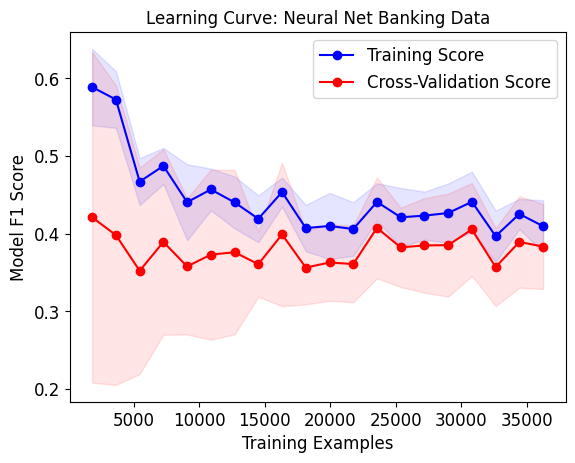

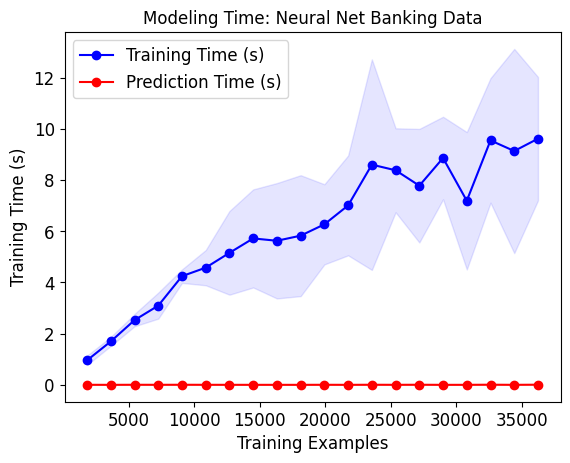

Iteration 1, loss = 0.31991570
Iteration 2, loss = 0.28526811
Iteration 3, loss = 0.28186092
Iteration 4, loss = 0.28073675
Iteration 5, loss = 0.28043023
Iteration 6, loss = 0.28004377
Iteration 7, loss = 0.27933184
Iteration 8, loss = 0.27894097
Iteration 9, loss = 0.27891733
Iteration 10, loss = 0.27867056
Iteration 11, loss = 0.27807439
Iteration 12, loss = 0.27793093
Iteration 13, loss = 0.27770747
Iteration 14, loss = 0.27749266
Iteration 15, loss = 0.27697423
Iteration 16, loss = 0.27732803
Iteration 17, loss = 0.27665059
Iteration 18, loss = 0.27640831
Iteration 19, loss = 0.27636019
Iteration 20, loss = 0.27596347
Iteration 21, loss = 0.27578165
Iteration 22, loss = 0.27580444
Iteration 23, loss = 0.27550445
Iteration 24, loss = 0.27539862
Iteration 25, loss = 0.27508426
Iteration 26, loss = 0.27517060
Iteration 27, loss = 0.27529637
Iteration 28, loss = 0.27476204
Iteration 29, loss = 0.27449657
Iteration 30, loss = 0.27501687
Iteration 31, loss = 0.27455217
Iteration 32, los

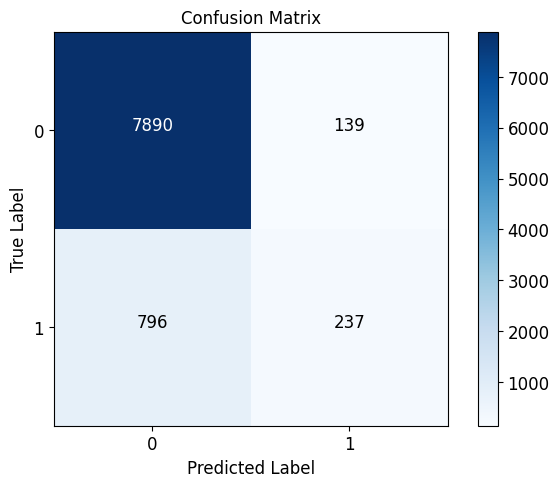

In [8]:
bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units")
h_units, learn_rate = NNGridSearchCV(X_train, y_train)
estimator_bank = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='logistic', 
                               learning_rate_init=learn_rate, random_state=100,verbose=True)
train_samp_bank, NN_train_score_bank, NN_fit_time_bank, NN_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="Neural Net Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

In [51]:
bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)

In [52]:
X_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])